<a href="https://colab.research.google.com/github/vinalyan/diff/blob/master/GeekBrains/algorithms/web6/Lessin6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя файл Lesson_6_extended.ipynb (он в web6.zip в материалах)::



# Реализация алгоритма градиентрого бустинга из лекции


In [230]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [231]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
    predictions = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        prediction = 0
        for alg in trees_list:
            prediction += eta * alg.predict([x])[0]
        predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [232]:
#функция ошибки
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def residual(y, z):
    return - (z - y)

In [233]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
       
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
        trees.append(tree)
        
    return trees #train_errors, test_errors

# Задание 1
Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [234]:
X, y, coef = make_regression(n_samples=500, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)

In [235]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=32)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 2), (150, 2), (350,), (150,))

## Зависимость от количества деревьев

In [236]:
# Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
train_errors_list = []
test_errors_list = []
eta = 1
max_depth = 5

num_trees = [1, 5, 10, 30, 50]
eta, max_depth, train_errors_list, test_errors_list

(1, 5, [], [])

In [237]:
for n_trees in num_trees:
  trees = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

  train_error = mean_squared_error(y_train, gb_predict(X_train, trees, eta))
  test_errors = mean_squared_error(y_test, gb_predict(X_test, trees, eta))
  train_errors_list.append(train_error)
  test_errors_list.append(test_errors)
  print(f'Кол-во деревьев: {n_trees}, Глубина: {max_depth}, Шаг: {eta}, Ошибка на обуч: {train_error: .3f}, Ошибка на тестовой: {test_errors: .3f}, R2: {r2_score(y_test, gb_predict(X_test, trees, eta)): .3f}')

Кол-во деревьев: 1, Глубина: 5, Шаг: 1, Ошибка на обуч:  648.294, Ошибка на тестовой:  1589.420, R2:  0.877
Кол-во деревьев: 5, Глубина: 5, Шаг: 1, Ошибка на обуч:  117.695, Ошибка на тестовой:  720.751, R2:  0.944
Кол-во деревьев: 10, Глубина: 5, Шаг: 1, Ошибка на обуч:  47.544, Ошибка на тестовой:  781.514, R2:  0.940
Кол-во деревьев: 30, Глубина: 5, Шаг: 1, Ошибка на обуч:  0.498, Ошибка на тестовой:  772.845, R2:  0.940
Кол-во деревьев: 50, Глубина: 5, Шаг: 1, Ошибка на обуч:  0.005, Ошибка на тестовой:  779.934, R2:  0.940


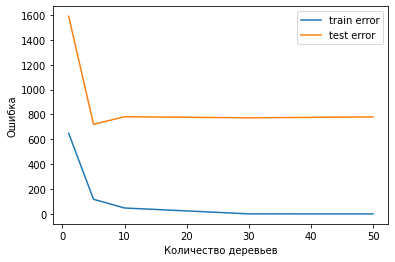

In [238]:
plt.xlabel('Количество деревьев')
plt.ylabel('Ошибка')
plt.plot(num_trees, train_errors_list, label='train error')
plt.plot(num_trees, test_errors_list, label='test error')
plt.legend(loc='upper right')
plt.show()

Переобучение начинается где-то между пятью и десятью деревьями

In [239]:
#Проверим руками
%time
n_trees = 5
max_depth = 5
eta = 1
trees = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

train_error = mean_squared_error(y_train, gb_predict(X_train, trees, eta))
test_errors = mean_squared_error(y_test, gb_predict(X_test, trees, eta))

print(f'Кол-во деревьев: {n_trees}, Глубина: {max_depth}, Шаг: {eta}, Ошибка на обуч: {train_error: .3f}, Ошибка на тестовой: {test_errors: .3f}, R2: {r2_score(y_test, gb_predict(X_test, trees, eta)):.3f}')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Кол-во деревьев: 5, Глубина: 5, Шаг: 1, Ошибка на обуч:  117.695, Ошибка на тестовой:  720.751, R2: 0.944


In [240]:
#Проверим руками
%time
n_trees = 6
max_depth = 5
eta = 1
trees = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

train_error = mean_squared_error(y_train, gb_predict(X_train, trees, eta))
test_errors = mean_squared_error(y_test, gb_predict(X_test, trees, eta))

print(f'Кол-во деревьев: {n_trees}, Глубина: {max_depth}, Шаг: {eta}, Ошибка на обуч: {train_error: .3f}, Ошибка на тестовой: {test_errors: .3f}, R2: {r2_score(y_test, gb_predict(X_test, trees, eta)):.3f}')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Кол-во деревьев: 6, Глубина: 5, Шаг: 1, Ошибка на обуч:  100.071, Ошибка на тестовой:  742.163, R2: 0.943


Похоже, что на для наших данных лучше всего показывает себя лес из 5 деревьев.
Начиная с 6 деревьев ошибка на обучаюшей выборке продолжает падать, а на тестовой повышаться.
Думаю, что это ведет к переобучению.



## Зависимость от губины

Проверим как влияет глубина.
Проверять будем на пяти деревьях, так как такой лес показал себя луяче всего в предыдущей проверке

In [241]:
train_errors_list.clear()
test_errors_list.clear()

eta = 1
n_trees = 5
max_depth_list = [1, 5, 7,8,9,10]
eta, train_errors_list, test_errors_list

(1, [], [])

In [242]:
for max_depth in max_depth_list:
  trees = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
  train_error = mean_squared_error(y_train, gb_predict(X_train, trees, eta))
  test_errors = mean_squared_error(y_test, gb_predict(X_test, trees, eta))
  train_errors_list.append(train_error)
  test_errors_list.append(test_errors)
  print(f'Кол-во деревьев: {n_trees}, Глубина: {max_depth}, Шаг: {eta}, Ошибка на обуч: {train_error: .3f}, Ошибка на тестовой: {test_errors: .3f}, R2: {r2_score(y_test, gb_predict(X_test, trees, eta)): .3f}')

Кол-во деревьев: 5, Глубина: 1, Шаг: 1, Ошибка на обуч:  2399.598, Ошибка на тестовой:  2915.442, R2:  0.775
Кол-во деревьев: 5, Глубина: 5, Шаг: 1, Ошибка на обуч:  117.695, Ошибка на тестовой:  720.751, R2:  0.944
Кол-во деревьев: 5, Глубина: 7, Шаг: 1, Ошибка на обуч:  14.540, Ошибка на тестовой:  602.655, R2:  0.953
Кол-во деревьев: 5, Глубина: 8, Шаг: 1, Ошибка на обуч:  1.394, Ошибка на тестовой:  657.563, R2:  0.949
Кол-во деревьев: 5, Глубина: 9, Шаг: 1, Ошибка на обуч:  0.487, Ошибка на тестовой:  641.026, R2:  0.951
Кол-во деревьев: 5, Глубина: 10, Шаг: 1, Ошибка на обуч:  0.000, Ошибка на тестовой:  655.146, R2:  0.949


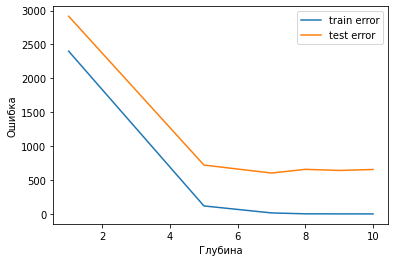

In [243]:
plt.xlabel('Глубина')
plt.ylabel('Ошибка')
#plt.xlim(0, n_trees)
plt.plot(max_depth_list, train_errors_list, label='train error')
plt.plot(max_depth_list, test_errors_list, label='test error')
plt.legend(loc='upper right')
plt.show()

Похоже, что для наших данных лучше всего подходит 5 деревьев и глубина 7.
Дальше начинается переобучение.

## Зависимость от шага

In [244]:
train_errors_list.clear()
test_errors_list.clear()

n_trees = 5
max_depth = 7

eta_list = [0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 1]
max_depth, train_errors_list, test_errors_list

(7, [], [])

In [245]:
for eta in eta_list:
  trees = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
  train_error = mean_squared_error(y_train, gb_predict(X_train, trees, eta))
  test_errors = mean_squared_error(y_test, gb_predict(X_test, trees, eta))
  train_errors_list.append(train_error)
  test_errors_list.append(test_errors)
  print(f'Кол-во деревьев: {n_trees}, Глубина: {max_depth}, Шаг: {eta}, Ошибка на обуч: {train_error: .3f}, Ошибка на тестовой: {test_errors: .3f}, R2: {r2_score(y_test, gb_predict(X_test, trees, eta)): .3f}')

Кол-во деревьев: 5, Глубина: 7, Шаг: 0.01, Ошибка на обуч:  11852.654, Ошибка на тестовой:  12019.607, R2:  0.072
Кол-во деревьев: 5, Глубина: 7, Шаг: 0.1, Ошибка на обуч:  4616.662, Ошибка на тестовой:  5279.074, R2:  0.593
Кол-во деревьев: 5, Глубина: 7, Шаг: 0.5, Ошибка на обуч:  20.518, Ошибка на тестовой:  412.071, R2:  0.968
Кол-во деревьев: 5, Глубина: 7, Шаг: 0.6, Ошибка на обуч:  6.956, Ошибка на тестовой:  374.474, R2:  0.971
Кол-во деревьев: 5, Глубина: 7, Шаг: 0.7, Ошибка на обуч:  6.440, Ошибка на тестовой:  395.722, R2:  0.969
Кол-во деревьев: 5, Глубина: 7, Шаг: 0.8, Ошибка на обуч:  7.254, Ошибка на тестовой:  484.237, R2:  0.963
Кол-во деревьев: 5, Глубина: 7, Шаг: 1, Ошибка на обуч:  14.540, Ошибка на тестовой:  602.655, R2:  0.953


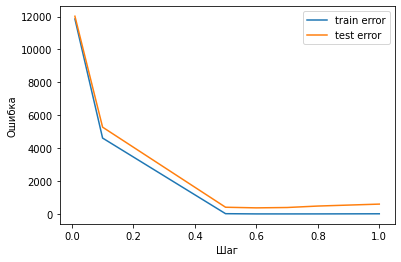

In [246]:
plt.xlabel('Шаг')
plt.ylabel('Ошибка')
#plt.xlim(0, n_trees)
plt.plot(eta_list, train_errors_list, label='train error')
plt.plot(eta_list, test_errors_list, label='test error')
plt.legend(loc='upper right')
plt.show()

Ну тут уже лучший вариант шаг = 0.6, при прочих равных

## Выводы
Как именно влияют показатели я, честно говоря не очень понял, но понял, что их надо тонко настраивать.
И они явно сильно зависят один от другого.

Лучший вариант, который у меня получился
* Кол-во деревьев: 5 
* Глубина: 7
* Шаг: 0.6
* Ошибка на обуч: 6.956
* Ошибка на тестовой:  374.474
* R2:  0.971


# Задание №2. * 
Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. 
Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [258]:
def gbs_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    #-----ТУТ РЕЖЕМ ВЫБОРКУ ПОПОЛАМ----------
    idx_train = np.random.randint(X_train.shape[0], size = X_train.shape[0] // 2)
    X_train_tmp = X_train[idx_train].copy()
    y_train_tmp = y_train[idx_train].copy()

    #-------ТУТ ЗАКАНЧИВАЕМ------------------------

    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []

    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на половине выборки
            tree.fit(X_train_tmp, y_train_tmp)

            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train_tmp, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_tmp, residual(y_train_tmp, target))

            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
            
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [260]:
#Проверим руками
%time
n_trees = 6
max_depth = 7
eta = 0.6
trees,train_err, test_err = gbs_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

train_error = mean_squared_error(y_train, gb_predict(X_train, trees, eta))
test_errors = mean_squared_error(y_test, gb_predict(X_test, trees, eta))

print(f'Кол-во деревьев: {n_trees}, Глубина: {max_depth}, Шаг: {eta}, Ошибка на обуч: {train_error: .3f}, Ошибка на тестовой: {test_errors: .3f}, R2: {r2_score(y_test, gb_predict(X_test, trees, eta)):.3f}')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Кол-во деревьев: 6, Глубина: 7, Шаг: 0.6, Ошибка на обуч:  568.869, Ошибка на тестовой:  1132.801, R2: 0.913


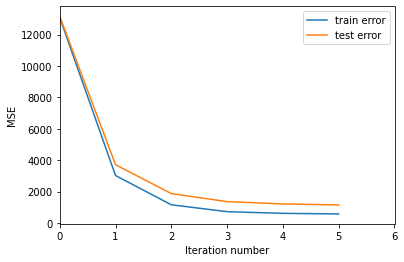

In [261]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()
get_error_plot(n_trees, train_err, test_err)

При условиях:
* Кол-во деревьев: 5 
* Глубина: 7
* Шаг: 0.6

Результат градиентного бустинга
* Ошибка на обуч: 6.956
* Ошибка на тестовой:  374.474
* R2:  0.971


Результат стахостичесого градиентного бустинга
* Ошибка на обуч:  718.683, 
* Ошибка на тестовой:  1202.202, 
* R2: 0.907

При прочих равных результаты сильно разнятся. 

Варианат два:
1. ошибка в реализации
2. для стахостического бустинга надо отдельно подбирать параметры

Время работы на сравнивал, так как для ускорения работы функции `gb_predict` удалил из нее рассчет ошибки на каждой итерации.

При этом чисто теоретически стахостический должен работать быстрее.